Questions needing answers:
1. What are the top 100 most popular(Grossing) movies Domestic/Foreign? Top grossing, collectively
3. What are the top 5 most popular genres both Domestic and Worldwide based on their gross?
4. What are the top three genres with the highest reviews? (Comparing numbered reviews and then letter reviews, seperatly)
# 5. What genres are watched the most during each season? ( Winter, Spring, Summer, Fall)

In [68]:
import pandas as pd
import os
from glob import glob

In [17]:
# glob finds all the files in a specified directory that match the condition
# we do this so we can open multiple files at once
csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [18]:
# tsv files, because later tsv files need to be opened with sep='\t'
tsv_files = glob("./zippedData/*.tsv.gz")
tsv_files

['./zippedData/rt.reviews.tsv.gz', './zippedData/rt.movie_info.tsv.gz']

In [19]:
data_dict = {}

for file in csv_files:
    data_dict[file] = pd.read_csv(file)
    
for file in tsv_files:
    data_dict[file] = pd.read_csv(file, sep='\t', encoding= 'unicode_escape') 

In [20]:
# beginning to solve for the highest grossing movies. Pulling budget dataframe into pandas to
# start breaking down and cleaning up the df.
data_dict['./zippedData/tn.movie_budgets.csv.gz']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [45]:
# Assigning this specific df to a def for easy referral throughout cleaning
mb=data_dict['./zippedData/tn.movie_budgets.csv.gz']

In [46]:
# Tells me that I need to convert the last three columns into int64 changing them from a 
# string to a numerical value
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [47]:
mb.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [48]:
mb.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [49]:
# Changing the index of the df to allow for a cleaner look
mb=mb.set_index('id')
mb

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [50]:
# Removing the $ sign from the currency columns to convert them from an object to an integer
mb['production_budget'] = mb['production_budget'].replace({'\$':''}, regex = True)
mb['domestic_gross'] = mb['domestic_gross'].replace({'\$':''}, regex = True)
mb['worldwide_gross'] = mb['worldwide_gross'].replace({'\$':''}, regex = True)
mb.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [51]:
mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [52]:
mb1 = mb.iloc[0:, 1:]

In [53]:
# Removing the thousand comma seperator from the monetary values
mb1['production_budget'] = mb1['production_budget'].replace({'\,':''}, regex = True)
mb1['domestic_gross'] = mb1['domestic_gross'].replace({'\,':''}, regex = True)
mb1['worldwide_gross'] = mb1['worldwide_gross'].replace({'\,':''}, regex = True)
mb1.head()

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000,760507625,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Dark Phoenix,350000000,42762350,149762350
4,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [54]:
#d = {'production_budget', 'domestic_gross', 'worldwide_gross'}

mb1["production_budget"] = mb1["production_budget"].astype(str).astype(int)
mb1["domestic_gross"] = mb1["domestic_gross"].astype(str).astype(int)
mb1["worldwide_gross"] = mb1["worldwide_gross"].astype(str).astype(int)
mb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   domestic_gross     5782 non-null   int64 
 3   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.9+ KB


In [58]:
# Finding profit values for each movie worldwide

mb1['production_profit_worldwide'] = mb1['worldwide_gross'] - mb1['production_budget']
mb1.head()

,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
id,,,,,,
1,Avatar,425000000,760507625,2776345279,2351345279,335507625
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125
3,Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650
4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382


In [59]:
# Finding profit values domestically

mb1['production_profit_domestic'] = mb1['domestic_gross'] - mb1['production_budget']
mb1.head()

,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
id,,,,,,
1,Avatar,425000000,760507625,2776345279,2351345279,335507625
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125
3,Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650
4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382


In [66]:
sorted_worldwide_profit = mb1.sort_values(['production_profit_worldwide'], ascending=False)
sorted_worldwide_profit

,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
id,,,,,,
1,Avatar,425000000,760507625,2776345279,2351345279,335507625
43,Titanic,200000000,659363944,2208208395,2008208395,459363944
7,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482
6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
34,Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...
53,Town & Country,105000000,6712451,10364769,-94635231,-98287549
42,Men in Black: International,110000000,3100000,3100000,-106900000,-106900000
94,Mars Needs Moms,150000000,21392758,39549758,-110450242,-128607242


In [67]:
sorted_domestic_profit = mb1.sort_values(['production_profit_domestic'], ascending=False)
sorted_domestic_profit

,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
id,,,,,,
6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
42,Black Panther,200000000,700059566,1348258224,1148258224,500059566
43,Titanic,200000000,659363944,2208208395,2008208395,459363944
65,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,449998007
34,Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...
32,Battleship,220000000,65233400,313477717,93477717,-154766600
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125
13,The Lone Ranger,275000000,89302115,260002115,-14997885,-185697885


In [95]:
sorted_domestic_profit.head(100)#[['id'],['movie', 'production_budget', 'domestic gross', 'production_profit_domestic']]

,movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic
id,,,,,,
6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225
42,Black Panther,200000000,700059566,1348258224,1148258224,500059566
43,Titanic,200000000,659363944,2208208395,2008208395,459363944
65,Star Wars Ep. IV: A New Hope,11000000,460998007,786598007,775598007,449998007
34,Jurassic World,215000000,652270625,1648854864,1433854864,437270625
...,...,...,...,...,...,...
33,The Incredibles,92000000,261441092,614726752,522726752,169441092
76,Wedding Crashers,40000000,209218368,283218368,243218368,169218368
84,Ted,50000000,218665740,556016627,506016627,168665740


In [139]:
mb1.loc(0, 4)

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [140]:
mb1.to_csv(index=False)

'movie,production_budget,domestic_gross,worldwide_gross,production_profit_worldwide,production_profit_domestic\nAvatar,425000000,760507625,2776345279,2351345279,335507625\nPirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125\nDark Phoenix,350000000,42762350,149762350,-200237650,-307237650\nAvengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868\nStar Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,303181382\nStar Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,630662225\nAvengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482\nPirates of the Caribbean: At Worldâ\x80\x99s End,300000000,309420425,963420425,663420425,9420425\nJustice League,300000000,229024295,655945209,355945209,-70975705\nSpectre,300000000,200074175,879620923,579620923,-99925825\nThe Dark Knight Rises,275000000,448139099,1084439099,809439099,173139099\nSolo: A Star Wars Story,275000000,213767

In [119]:
import matplotlib.pyplot as plt

ValueError: cannot copy sequence with size 5782 to array axis with dimension 6

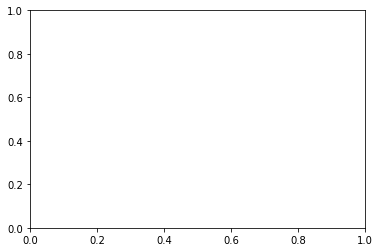

In [125]:
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.
plt.plot([mb1['production_budget']], [mb1, ['production_profit_domestic']])

# Add labels for x and y axes
plt.xlabel('Budget')
plt.ylabel('Profit')

# Add a title for the plot
plt.title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
plt.legend(loc=4)

# Output the final plot
plt.show()